In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import nltk
import re

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/antonindoat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/antonindoat/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/antonindoat/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/antonindoat/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
df = pd.read_csv("bbc-news-data.csv", sep='\t')

In [4]:
df['total_content']=df['title'] + ' ' + df['content']
df = df.drop(columns=['filename','title','content'])
df.head()

,category,total_content
0,business,Ad sales boost Time Warner profit Quarterly p...
1,business,Dollar gains on Greenspan speech The dollar h...
2,business,Yukos unit buyer faces loan claim The owners ...
3,business,High fuel prices hit BA's profits British Air...
4,business,Pernod takeover talk lifts Domecq Shares in U...


In [5]:
df = df.map(lambda line : line.lower())
df.head()

,category,total_content
0,business,ad sales boost time warner profit quarterly p...
1,business,dollar gains on greenspan speech the dollar h...
2,business,yukos unit buyer faces loan claim the owners ...
3,business,high fuel prices hit ba's profits british air...
4,business,pernod takeover talk lifts domecq shares in u...


Tokenization

In [6]:
# Listes pour stocker les tokens et les variétés
content_token = []
category_token = []

# Parcours des descriptions
for i, text_description in enumerate(tqdm(df["total_content"], desc="Tokenizing")):
    words_token = word_tokenize(text_description)
    content_token.append(words_token)
    category_token.append(df.loc[i, "category"])  # récupère la variété correspondante

# Création du DataFrame final
df_tokenise = pd.DataFrame({
    "total_content": content_token,
    "category": category_token
})

Tokenizing:   0%|          | 0/2225 [00:00<?, ?it/s]

Tokenizing: 100%|██████████| 2225/2225 [00:09<00:00, 235.92it/s]


In [7]:
import re
import string

def clean_tokens(tokens):
    cleaned = [re.sub(f"[{string.punctuation}0-9]", "", w) for w in tokens]
    # Supprimer les tokens vides après nettoyage
    return [w for w in cleaned if w != ""]

# Appliquer sur la colonne
df_tokenise['total_content_clean'] = df_tokenise['total_content'].apply(clean_tokens)

In [8]:
df_tokenise.head()

,total_content,category,total_content_clean
0,"[ad, sales, boost, time, warner, profit, quart...",business,"[ad, sales, boost, time, warner, profit, quart..."
1,"[dollar, gains, on, greenspan, speech, the, do...",business,"[dollar, gains, on, greenspan, speech, the, do..."
2,"[yukos, unit, buyer, faces, loan, claim, the, ...",business,"[yukos, unit, buyer, faces, loan, claim, the, ..."
3,"[high, fuel, prices, hit, ba, 's, profits, bri...",business,"[high, fuel, prices, hit, ba, s, profits, brit..."
4,"[pernod, takeover, talk, lifts, domecq, shares...",business,"[pernod, takeover, talk, lifts, domecq, shares..."


In [9]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

varieties_lemmat = []
description_lemmat = []

for i, list_token in enumerate(tqdm(df_tokenise["total_content"], desc="Lemmatizating")):    
    # loop for stemming each word
    description_lemmat.append([lemmatizer.lemmatize(word) for word in list_token]) 
    
    varieties_lemmat.append(df_tokenise.loc[i, "category"])  # variety
    
# Création du DataFrame final
df_lemmat = pd.DataFrame({
    "total_content": description_lemmat,
    "category": varieties_lemmat
})

Lemmatizating: 100%|██████████| 2225/2225 [00:12<00:00, 175.04it/s]


In [10]:
df_lemmat.head()

,total_content,category
0,"[ad, sale, boost, time, warner, profit, quarte...",business
1,"[dollar, gain, on, greenspan, speech, the, dol...",business
2,"[yukos, unit, buyer, face, loan, claim, the, o...",business
3,"[high, fuel, price, hit, ba, 's, profit, briti...",business
4,"[pernod, takeover, talk, lift, domecq, share, ...",business


In [11]:
nltk.download('stopwords')
from nltk.corpus import stopwords

#List of stop words
stop_words = set(stopwords.words('english'))

#Delete stopwords
df_lemmat['total_content'] = df_lemmat['total_content'].apply(
    lambda x: [word for word in x if word not in stop_words]
)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antonindoat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
df_lemmat.head()

,total_content,category
0,"[ad, sale, boost, time, warner, profit, quarte...",business
1,"[dollar, gain, greenspan, speech, dollar, ha, ...",business
2,"[yukos, unit, buyer, face, loan, claim, owner,...",business
3,"[high, fuel, price, hit, ba, 's, profit, briti...",business
4,"[pernod, takeover, talk, lift, domecq, share, ...",business


In [13]:
# Transformer les labels en entiers
le = LabelEncoder()
y = le.fit_transform(df['category'])

In [14]:
# Transforme en liste de chaine de caractere pour la vectorization 
df_lemmat["total_content"] = df_lemmat["total_content"].apply(
    lambda x : " ".join(x) 
)

## Count Vectorizer + Logistic Regression

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorisation (sac de mots)
vectorizer = CountVectorizer()
df_vector = vectorizer.fit_transform(df_lemmat["total_content"])


In [ ]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(df_vector, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Modèle
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Accuracy : 0.9701

Classification report :
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       165
           1       0.96      0.99      0.97       118
           2       0.96      0.96      0.96       120
           3       0.97      1.00      0.99       140
           4       1.00      0.96      0.98       125

    accuracy                           0.97       668
   macro avg       0.97      0.97      0.97       668
weighted avg       0.97      0.97      0.97       668



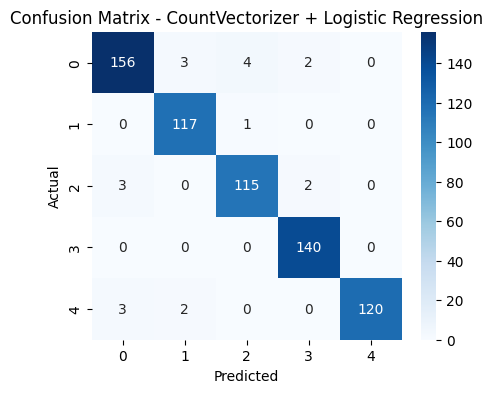

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prédictions
y_pred = lr_model.predict(X_test)

# Performances
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc:.4f}\n")
print("Classification report :")
print(classification_report(y_test, y_pred))

# Matrice de confusion
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - CountVectorizer + Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Performance analysis:

The model achieves an impressive accuracy of 97%, indicating that the simple bag-of-words representation is already highly effective for this classification task.
Precision, recall, and F1-scores are consistently high across all classes (ranging between 0.95 and 1.00), showing that the model performs well in both identifying and correctly classifying the different categories.

Class 3 is predicted almost perfectly (recall = 1.00), meaning the model successfully captures all its examples.
Class 4 shows a slightly lower recall (0.96) but perfect precision (1.00), suggesting that when the model predicts class 4, it is always correct, though it occasionally misses a few true instances.

### Conclusion:

The CountVectorizer + Logistic Regression combination delivers strong and balanced performance across all labels.

## Word2Vec + BiLSTM

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Crée le tokenizer sur tout le corpus
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_lemmat['total_content'].apply(lambda x: ' '.join(x)))

# Transforme les textes en séquences d'entiers
sequences = tokenizer.texts_to_sequences(df_lemmat['total_content'].apply(lambda x: ' '.join(x)))

# Définir la longueur max des séquences
max_len = 100  # à ajuster selon ton dataset
X = pad_sequences(sequences, maxlen=max_len, padding='post')


Encodage des labels

In [33]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

y = df_lemmat['category']
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)
num_classes = len(np.unique(y_enc))
y_cat = to_categorical(y_enc, num_classes)


Word2Vec

In [34]:
from gensim.models import Word2Vec

# Word2Vec nécessite une liste de tokens par document
documents = df_lemmat['total_content'].tolist()

# Entraînement Word2Vec
w2v_model = Word2Vec(sentences=documents, vector_size=100, window=5, min_count=1, workers=4)

# Crée la matrice d'embedding
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]


BilSTM

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              input_length=max_len,
              trainable=False),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │         4,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,000 (15.62 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,000 (15.62 KB)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42, stratify=y_cat)

In [39]:
history = model.fit(
    X_train, y_train,
    epochs=30,           # augmenter si nécessaire
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - accuracy: 0.4438 - loss: 1.3419 - val_accuracy: 0.2949 - val_loss: 1.6078
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - accuracy: 0.4712 - loss: 1.2817 - val_accuracy: 0.2893 - val_loss: 1.5997
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step - accuracy: 0.4782 - loss: 1.2568 - val_accuracy: 0.2978 - val_loss: 1.6879
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 148ms/step - accuracy: 0.5197 - loss: 1.1822 - val_accuracy: 0.3315 - val_loss: 1.6233
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - accuracy: 0.5393 - loss: 1.1465 - val_accuracy: 0.3258 - val_loss: 1.6866
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.5906 - loss: 1.0710 - val_accuracy: 0.3174 - val_loss: 1.7292
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - accuracy: 0.5990 - loss: 1.0140 - val_accuracy: 0.3062 - val_loss: 1.7107
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - accuracy: 0.6250 - loss: 0.9509 - val_accuracy: 0.

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.3865 - loss: 3.4314
Test Accuracy: 0.3865
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
              precision    recall  f1-score   support

           0       0.38      0.42      0.40       102
           1       0.37      0.30      0.33        77
           2       0.30      0.29      0.29        84
           3       0.50      0.40      0.45       102
           4       0.38      0.51      0.44        80

    accuracy                           0.39       445
   macro avg       0.39      0.38      0.38       445
weighted avg       0.39      0.39      0.38       445



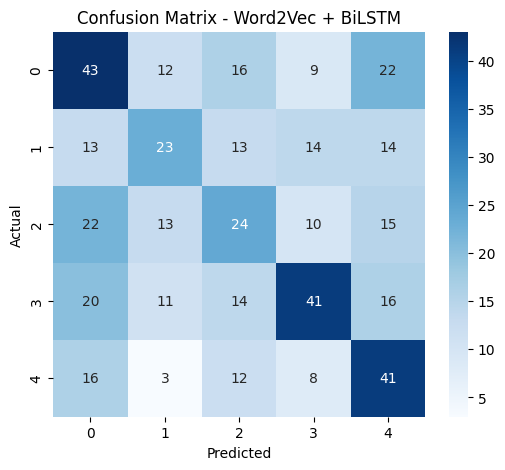

In [41]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Word2Vec + BiLSTM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Performance analysis:

After 30 epochs, the model reaches a training accuracy close to 97–98%, but the validation accuracy stagnates around 35–36%, and the test accuracy is only ≈39%.

Precision, recall, and F1-scores remain low across all classes, indicating that the model struggles to generalize despite almost perfect training performance.

The training loss decreases steadily, but the validation/test loss increases, which is a clear sign of severe overfitting.

### Conclusion

Overfitting: The BiLSTM memorizes the training data but fails to generalize, as shown by the low validation/test accuracy.

Dataset size limitation: With only ~2,200 samples, there isn’t enough data to train a recurrent network effectively.

## CountVectorizer + Dense model (Keras fully connected NN)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorisation (sac de mots)
vectorizer = CountVectorizer()
df_vector_2 = vectorizer.fit_transform(df_lemmat["total_content"])


In [24]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(df_vector_2, y, test_size=0.3, random_state=42)

X_train = X_train.toarray()
X_test = X_test.toarray()

Encoder

In [25]:
import tensorflow as tf
print(tf.__version__)


2025-10-31 11:47:21.203227: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.16.2


In [26]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)

num_classes = len(np.unique(y_train_enc))
y_train_cat = to_categorical(y_train_enc, num_classes)
y_test_cat = to_categorical(y_test_enc, num_classes)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

input_dim = X_train.shape[1]

model = Sequential([
    Dense(512, input_dim=input_dim, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │    13,578,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,710,853 (52.30 MB)

 Trainable params: 13,710,853 (52.30 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - accuracy: 0.8779 - loss: 0.4225 - val_accuracy: 0.9744 - val_loss: 0.1804
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - accuracy: 0.9984 - loss: 0.0055 - val_accuracy: 0.9808 - val_loss: 0.0552
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 188ms/step - accuracy: 0.9992 - loss: 0.0016 - val_accuracy: 0.9776 - val_loss: 0.1221
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step - accuracy: 1.0000 - loss: 1.3962e-04 - val_accuracy: 0.9744 - val_loss: 0.1375
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - accuracy: 1.0000 - loss: 1.3841e-04 - val_accuracy: 0.9776 - val_loss: 0.1348
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 1.0000 - loss: 6.7142e-05 - val_accuracy: 0.9776 - val_loss: 0.1313
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 238ms/step - accuracy: 1.0000 - loss: 9.9321e-05 - val_accuracy: 0.9808 - val_loss: 0.1279
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 191ms/step - accuracy: 1.0000 - loss: 5.9714e

Test Accuracy: 0.9656
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       165
           1       0.97      0.97      0.97       118
           2       0.96      0.93      0.95       120
           3       0.99      0.99      0.99       140
           4       0.97      0.98      0.97       125

    accuracy                           0.97       668
   macro avg       0.97      0.97      0.97       668
weighted avg       0.97      0.97      0.97       668



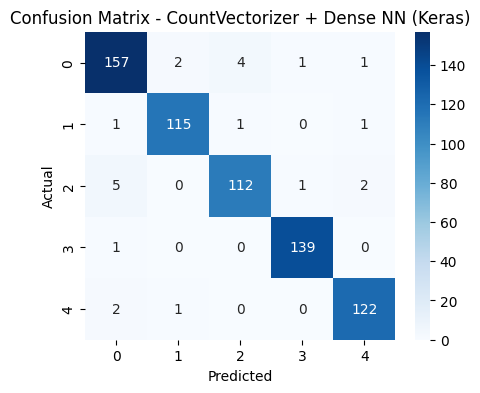

In [31]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {acc:.4f}")

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

print("Classification Report:")
print(classification_report(y_test_enc, y_pred))

cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - CountVectorizer + Dense NN (Keras)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Performance analysis:

The neural network demonstrates strong classification performance, reaching a test accuracy close to 97%.
All classes exhibit high precision, recall, and F1-scores — ranging between 0.93 and 0.99 — which indicates that the model successfully learns and generalizes the distinctive lexical patterns associated with each category.

During training, the model rapidly achieved perfect accuracy on the training set, while the validation accuracy stabilized around 0.98.
This behavior suggests that the model fits the data very efficiently, but also begins to slightly overfit after a few epochs, as seen from the minimal improvement in validation metrics.

The confusion matrix confirms that the model rarely misclassifies samples, with only a few errors between conceptually close categories.
The Dropout layers used during training help reduce overfitting and maintain strong generalization.

### Conclusion:

The fully connected neural network trained on count-based text representations is capable of achieving high and stable performance.